In [1]:
import pandas as pd
from zlib import crc32
import sys
import os
assert sys.version_info >= (3,7)
from packaging import version
import sklearn
import seaborn as sns
import numpy as np
import sklearn.utils
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
import matplotlib.pyplot as plt
from openexchangerate import OpenExchangeRates
client = OpenExchangeRates(api_key="222b45a44e6942febcc242d1db027ddc")
import scipy.stats as stats
#plotting figures
%matplotlib inline
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

#Saving figures
PROJECT_ROOT_DIR = "/home/christian/compsci/ml_python/books_ml"
IMAGES_PATH = os.path.join("PROJECT_ROOT_DIR", "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path=os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
    

In [2]:
import os
BOOKS_PATH = os.path.join("/home/christian/compsci/ml_python/books_ml", "archive")

In [3]:
def fetch_data(books_path=BOOKS_PATH):
    os.makedirs(books_path, exist_ok=True)

In [4]:
fetch_data()

In [5]:
 def load_book_data(books_path=BOOKS_PATH):
        csv_path = os.path.join(books_path, "google_books_1299.csv")
        return pd.read_csv(csv_path, index_col=[0])

In [6]:
books = load_book_data()
books.head()

title          author  rating  \
0                        Attack on Titan: Volume 13  Hajime Isayama     4.6   
1  Antiques Roadkill: A Trash 'n' Treasures Mystery   Barbara Allan     3.3   
2                    The Art of Super Mario Odyssey        Nintendo     3.9   
3    Getting Away Is Deadly: An Ellie Avery Mystery     Sara Rosett     4.0   
4         The Painted Man (The Demon Cycle, Book 1)  Peter V. Brett     4.5   

  voters   price currency                                        description  \
0    428   43.28      SAR  NO SAFE PLACE LEFT At great cost to the Garris...   
1     23   26.15      SAR  Determined to make a new start in her quaint h...   
2      9  133.85      SAR  Take a globetrotting journey all over the worl...   
3     10   26.15      SAR  With swollen feet and swelling belly, pregnant...   
4    577   28.54      SAR  The stunning debut fantasy novel from author P...   

                     publisher  page_count  \
0              Kodansha Comics         192   
1  Kensington Publishing Corp.         288   
2            Dark Horse Comics         368   
3  Kensington Publishing Corp.         320   
4             HarperCollins UK         544   

                                             generes           ISBN language  \
0                                               none  9781612626864  English   
1  Fiction , Mystery &amp, Detective , Cozy , Gen...  9780758272799  English   
2    Games &amp, Activities , Video &amp, Electronic  9781506713816  English   
3                                               none  9781617734076  English   
4                   Fiction , Fantasy , Dark Fantasy  9780007287758  English   

  published_date  
0   Jul 31, 2014  
1    Jul 1, 2007  
2    Nov 5, 2019  
3    Mar 1, 2009  
4    Jan 8, 2009

In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1298
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1299 non-null   object 
 1   author          1299 non-null   object 
 2   rating          1224 non-null   float64
 3   voters          1224 non-null   object 
 4   price           1299 non-null   float64
 5   currency        1299 non-null   object 
 6   description     1296 non-null   object 
 7   publisher       1299 non-null   object 
 8   page_count      1299 non-null   int64  
 9   generes         1299 non-null   object 
 10  ISBN            1299 non-null   object 
 11  language        1299 non-null   object 
 12  published_date  1299 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 142.1+ KB


In [8]:
for col in books.columns:
    pct_missing = np.mean(books[col].isnull())
    print('{} - {}%'.format(col, pct_missing))


title - 0.0%
author - 0.0%
rating - 0.057736720554272515%
voters - 0.057736720554272515%
price - 0.0%
currency - 0.0%
description - 0.0023094688221709007%
publisher - 0.0%
page_count - 0.0%
generes - 0.0%
ISBN - 0.0%
language - 0.0%
published_date - 0.0%


In [9]:
median = books['rating'].median()
books['rating'].fillna(median)

0       4.6
1       3.3
2       3.9
3       4.0
4       4.5
       ... 
1294    4.7
1295    4.8
1296    3.5
1297    4.6
1298    4.3
Name: rating, Length: 1299, dtype: float64

In [10]:
#We do not need for predictions
del books["ISBN"]
del books["language"]
del books["title"]
del books["currency"]   #All currency is SAR or Free, this is garbage data
del books["description"]
#del books["voters"]     #ambiguous description of what
                        # a "voter" is. 

In [11]:
#Confirm deletion of cols and dtypes
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1298
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   author          1299 non-null   object 
 1   rating          1224 non-null   float64
 2   voters          1224 non-null   object 
 3   price           1299 non-null   float64
 4   publisher       1299 non-null   object 
 5   page_count      1299 non-null   int64  
 6   generes         1299 non-null   object 
 7   published_date  1299 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 91.3+ KB


In [12]:
books['author'].drop_duplicates().sort_values(ascending=False)

203           Zoe Ferraris
218             Zig Ziglar
847       Yevgeny Zamyatin
38     William Shakespeare
555      William J. O'Neil
              ...         
31               Alex Lake
374             Alan Moore
298               Al Ewing
11         Agatha Christie
9                 Adam Kay
Name: author, Length: 183, dtype: object

In [13]:
def removal(x):
    if (x>upper):
        x=upper
    elif(x<lower):
        x=lower
    return x

def removeupper(x):
    if (x>upper):
        x=upper
    return x;

ot = pd.DataFrame(books.page_count)
upper=np.percentile(ot,[99])[0]
print(upper)
lower = np.percentile(ot,[1])[0]
print(lower)
gs=ot['page_count'].apply(removal)
print(gs)
books.page_count = gs

#ot=pd.DataFrame(books.price)
#upper=np.percentile(ot,[95])[0]
#print(upper)
#gs=ot['price'].apply(removeupper)
#print(gs)
#books.page_count = gs



2192.0
15.0
0       192.0
1       288.0
2       368.0
3       320.0
4       544.0
        ...  
1294    112.0
1295    368.0
1296    176.0
1297    168.0
1298    448.0
Name: page_count, Length: 1299, dtype: float64


Saving figure attribute_hist_plts


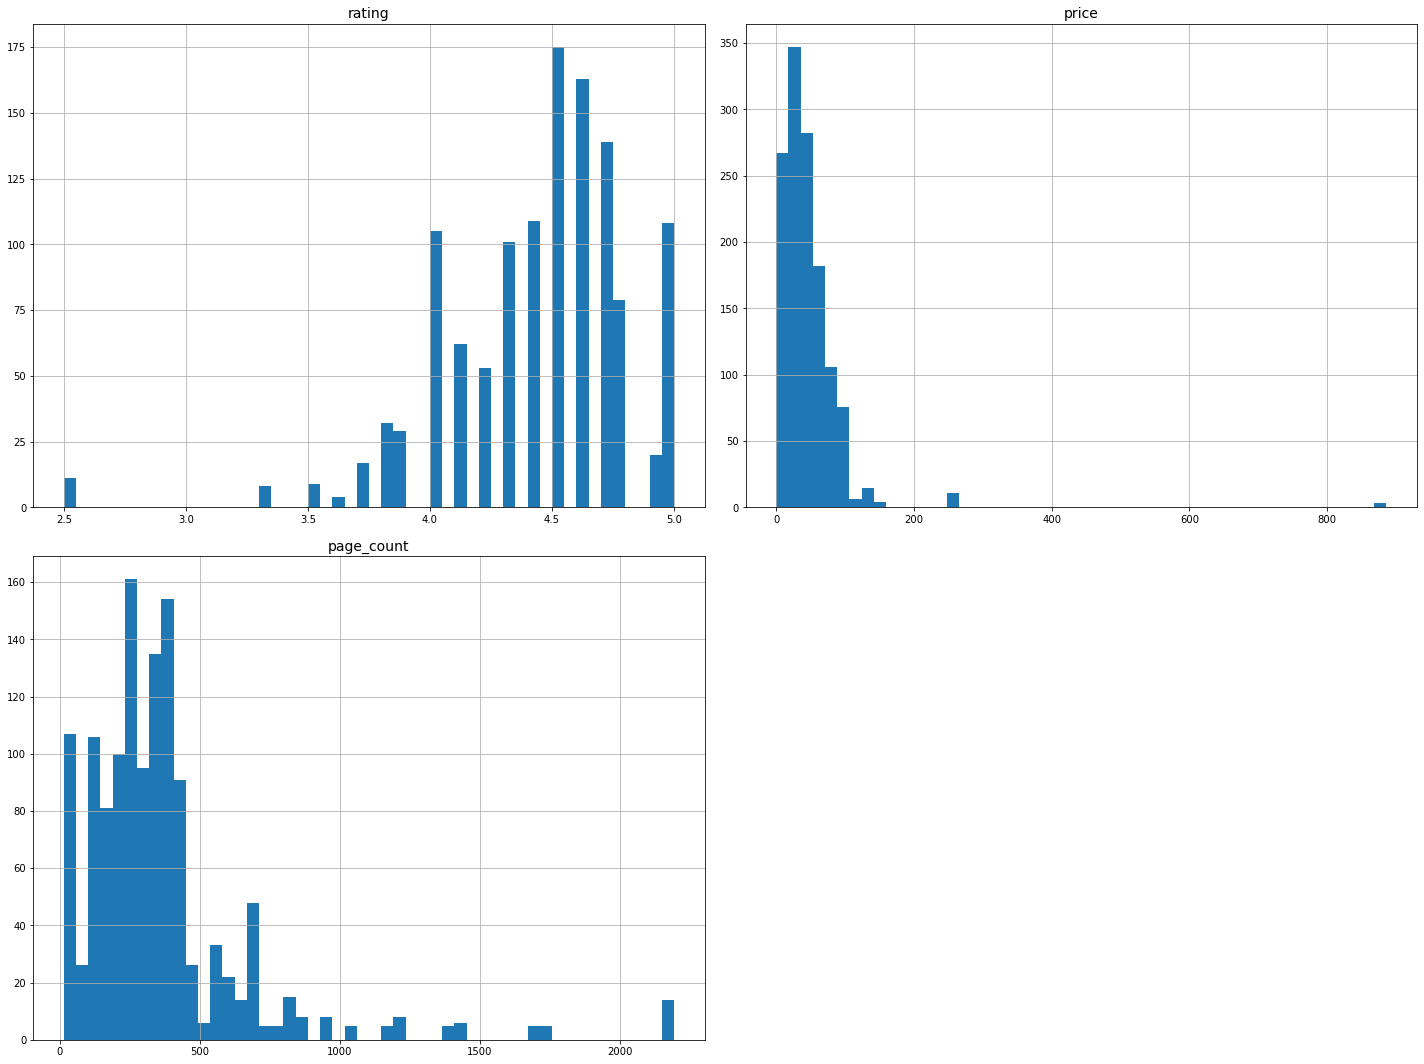

In [14]:
books.hist(bins=50, figsize=(20,15))
save_fig("attribute_hist_plts")
plt.show()
np.random.seed(42)

In [15]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [16]:
train_set, test_set = split_train_test(books, 0.2)
print(len(train_set), "train +", len(test_set), "test")

1040 train + 259 test


In [17]:
def test_set_check(indentifier, test_ratio):
    return crc32(np.int64(indentifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids + data[id_column]
    in_test_set = ids.apply(lambda id_:test_set_check(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [18]:
test_set.head()

author  rating voters  price       publisher  \
1231                  Adam Kay     4.7     47  41.82   Pan Macmillan   
578                 Rhys Bowen     3.8    103  31.46         Penguin   
1164  Chimamanda Ngozi Adichie     4.2    272  23.85         Vintage   
722                Jana DeLeon     4.8     85  23.59     Jana DeLeon   
561           Steven D. Levitt     4.3    532  50.25  Harper Collins   

      page_count                                          generes  \
1231       112.0      Humor , Topic , Business &amp, Professional   
578        336.0                                             none   
1164        32.0  Social Science , Feminism &amp, Feminist Theory   
722        360.0                                             none   
561        304.0                Business &amp, Economics , Skills   

     published_date  
1231   Oct 17, 2019  
578     Jul 1, 2008  
1164   Jul 29, 2014  
722     Aug 8, 2016  
561    May 12, 2014

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(books, test_size=0.2, random_state=42)

In [20]:
test_set.head()

author  rating voters  price       publisher  \
1231                  Adam Kay     4.7     47  41.82   Pan Macmillan   
578                 Rhys Bowen     3.8    103  31.46         Penguin   
1164  Chimamanda Ngozi Adichie     4.2    272  23.85         Vintage   
722                Jana DeLeon     4.8     85  23.59     Jana DeLeon   
561           Steven D. Levitt     4.3    532  50.25  Harper Collins   

      page_count                                          generes  \
1231       112.0      Humor , Topic , Business &amp, Professional   
578        336.0                                             none   
1164        32.0  Social Science , Feminism &amp, Feminist Theory   
722        360.0                                             none   
561        304.0                Business &amp, Economics , Skills   

     published_date  
1231   Oct 17, 2019  
578     Jul 1, 2008  
1164   Jul 29, 2014  
722     Aug 8, 2016  
561    May 12, 2014

<AxesSubplot:>

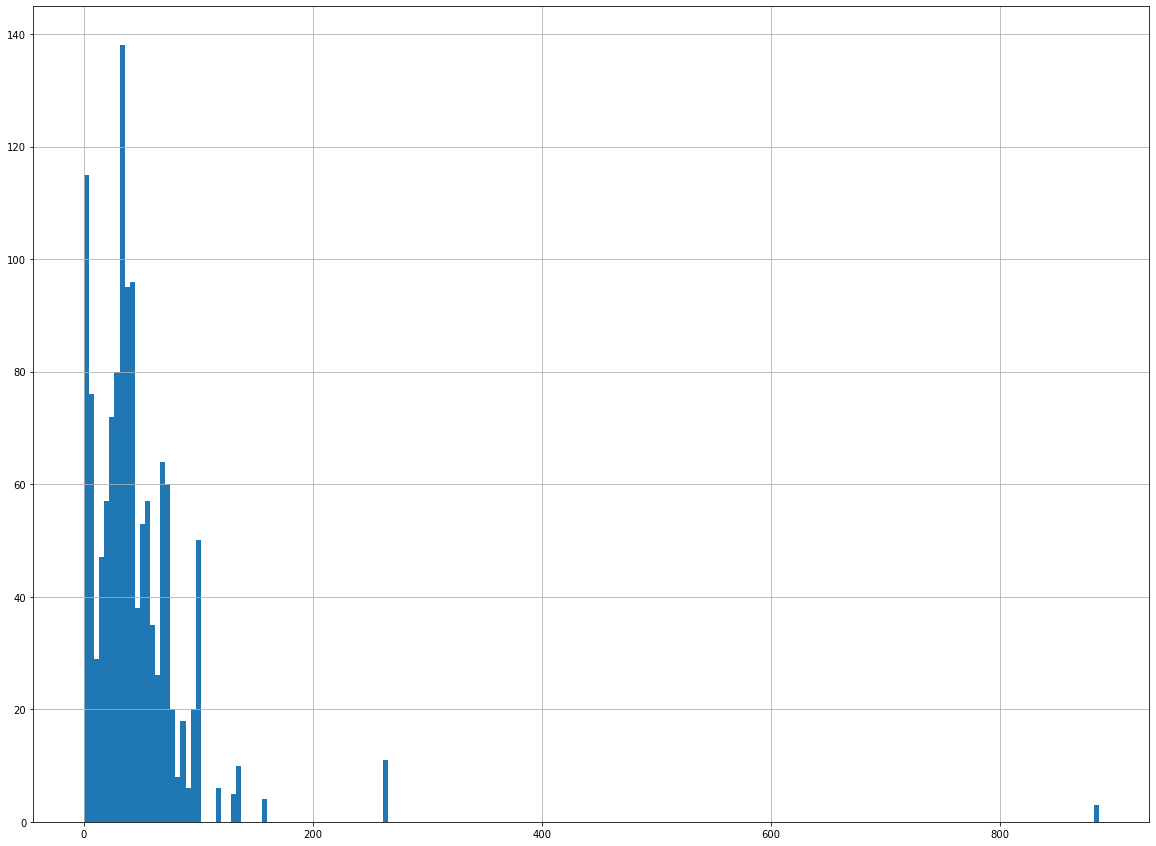

In [21]:


books["price"].hist(bins=200, figsize=(20,15))

In [127]:
from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(books, books["price"]):
    strat_train_set = books.loc[train_index]
    strat_test_set = books.loc[test_index]

<AxesSubplot:xlabel='price', ylabel='rating'>

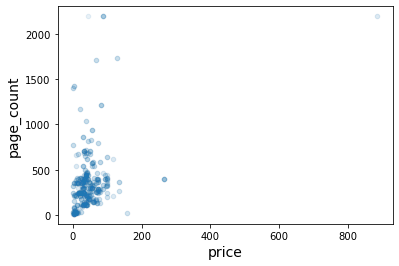

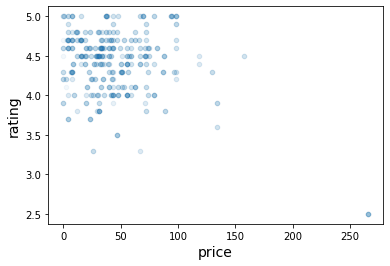

In [128]:
#visualizing the data points

books.plot(kind="scatter", x="price", y="page_count", alpha=0.05)
books.plot(kind="scatter", x="price", y="rating", alpha=0.05)

In [129]:
books.corr(method='spearman')


/tmp/ipykernel_31716/3128868661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  books.corr(method='spearman')


rating     price  page_count
rating      1.000000 -0.078441    0.065002
price      -0.078441  1.000000    0.322796
page_count  0.065002  0.322796    1.000000

In [130]:
books_numerized = books

for col_name in books_numerized.columns:
    if(books_numerized[col_name].dtype == 'object'):
        books_numerized[col_name] = books_numerized[col_name].astype('category')
        books_numerized[col_name] = books_numerized[col_name].cat.codes
    
    
books_numerized

author  rating  voters   price  publisher  page_count  generes  \
0         71     4.6     101   43.28         47       192.0      241   
1         12     3.3      55   26.15         44       288.0      130   
2        128     3.9     154  133.85         20       368.0      163   
3        152     4.0      15   26.15         44       320.0      241   
4        135     4.5     123   28.54         34       544.0      113   
...      ...     ...     ...     ...        ...         ...      ...   
1294       0     4.7     107   41.82         60       112.0      183   
1295     114     4.8     115   46.85         63       368.0      200   
1296      16     3.5      89   46.85         48       176.0      241   
1297      74     4.6     141   43.28         50       168.0      241   
1298     164     4.3      48   39.34         61       448.0      158   

      published_date  
0                108  
1                 87  
2                173  
3                126  
4                 86  
...              ...  
1294             187  
1295             208  
1296              20  
1297              44  
1298             202  

[1299 rows x 8 columns]

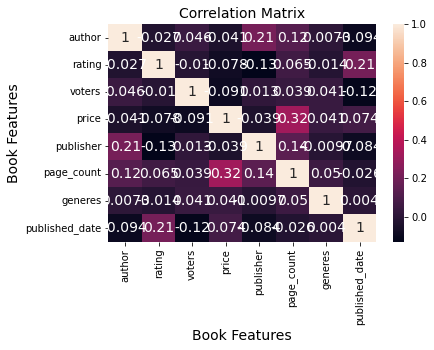

<AxesSubplot:xlabel='price', ylabel='page_count'>

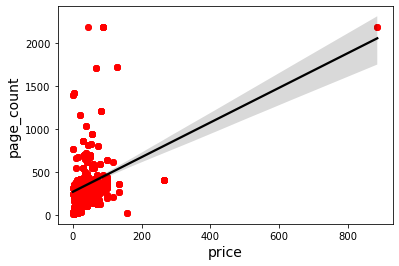

In [131]:
corr_matrix = books_numerized.corr(method='spearman')
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Book Features')
plt.ylabel('Book Features')
plt.show()
sns.regplot(x='price', y='page_count', data=books, scatter_kws={"color": "red"}, line_kws={"color":"black"})